<a href="https://colab.research.google.com/github/Fatehbs/AI-applications/blob/main/2D_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
samples_df = pd.DataFrame(
    data = np.random.uniform(low = -1, high = 1, size = [10000, 2]),
    columns = ['x', 'y']
)

In [3]:

samples_df.eval('prior_nll = 0', inplace = True)
for _ in range(1000):
    samples_df.eval('loss = (x**2 + y**2 - 0.75**2)**2', inplace = True)
    samples_df.eval('pred_posterior_nll = loss + prior_nll', inplace = True)
    samples_df.eval('posterior_w = exp(-pred_posterior_nll)', inplace = True)
    sum_posterior_w = samples_df['posterior_w'].sum()
    samples_df.eval('posterior_p =  posterior_w / @sum_posterior_w', inplace = True)
    samples_df.eval('posterior_nll = -log(1.0e-6 + posterior_p)', inplace = True)
    samples_df.eval('prior_nll = posterior_nll', inplace = True)


<Axes: xlabel='x', ylabel='y'>

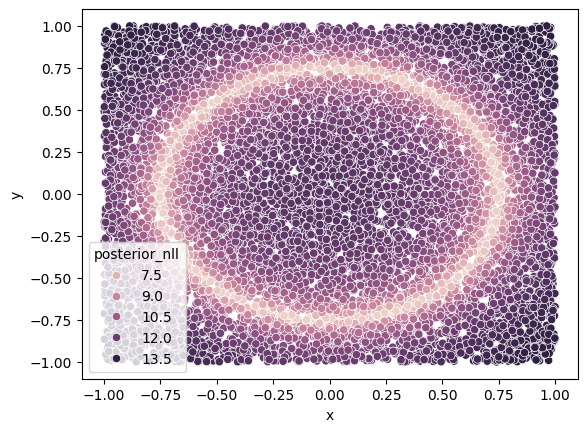

In [4]:
sns.scatterplot(x = 'x', y = 'y', hue = 'posterior_nll', data = samples_df)